#**Project Title : Email Campaign Effectiveness Prediction**


## **Github Link** - **[link text](https://github.com/akshatbhuryan/machine_learning_capstone_project)**

##### **Project Type**    - Classification
##### **Contribution**    - Individual


##**Problem Description**


The main objective is to create a machine learning model to characterize the mail and track
the mail that is ignored; read; acknowledged by the reader.
Data columns are self-explanatory.

##**Introduction:**
Email Marketing can be defined as a marketing technique in which businesses stay connected with their customers through emails, making them aware about their new products, updates, important notices related to the products they are using.

Most importantly, email marketing allows businesses to build relationships with leads, new customers and past customers. It's a way to communicate directly to the customers in their inbox, at a time that is convenient for them. With the right messaging tone and strategies, emails are one of the most important marketing channels.

We all subscribe to many different kinds of businesses through emails because it's required to do so, sometimes to get digital receipts of the things we bought or to get digital information about the business to stay updated. But many of times we do not tend to read an email due to a number of reasons - to name a few would be- no proper structure, too many images, too many links inside the mail, complex vocabulary used or simply too long emails.

In this problem statement, we will be trying to create machine learning models that characterize and predict whether the mail is ignored, read or acknowledged by the reader. In addition to this, we will be trying to analyze and find all the features that are important for an email to not get ignored.




##Data Summary:
Our email campaign dataset have 68353 observations and 12 features. Clearly Email_Status is our target variable.

Our features:
* **Email Id** - It contains the email id's of the customers/individuals
* **Email Type** - There are two categories 1 and 2. We can think of them as marketing emails or important updates, notices like emails regarding the business.
* **Subject Hotness Score** - It is the email's subject's score on the basis of how good and effective the content is.
* **Email Source** - It represents the source of the email like sales and marketing or important admin mails related to the product.
* **Email Campaign Type** - The campaign type of the email.
* **Total Past Communications** - This column contains the total previous mails from the same source, the number of communications had.
* **Customer Location** - Contains demographical data of the customer, the location where the customer resides.
* **Time Email sent Category** - It has three categories 1,2 and 3; the time of the day when the email was sent, we can think of it as morning, evening and night time slots.
* **Word Count** - The number of words contained in the email.
* **Total links** - Number of links in the email.
* **Total Images** - Number of images in the email.
* **Email Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader.

In [ ]:
#Importing important libraries and modules
#for data reading and manipulation
import pandas as pd
import numpy as np

#for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modelling
#Train-Test Split
from sklearn.model_selection import train_test_split
#Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#reading the csv dataset
df = pd.read_csv("/content/drive/MyDrive/data_email_campaign.csv")

In [ ]:
#first look of our dataset
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [ ]:
# Getting the shape for the data.
print("Rows:",df.shape[0], "Columns:", df.shape[1])

Rows: 68353 Columns: 12


In [ ]:
#basic info about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


##**Data Cleaning and PreProcessing:**


In [ ]:
#get the num of nulls in each column
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

We have a lot of nulls in the following columns:
* Customer Location
* Total Past Communications
* Total Links
* Total Images



In [ ]:
#filling up the null values for total past communications.
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].mean(), inplace = True)

In [ ]:
#filling up the Total Links Column
df['Total_Links'].fillna(df['Total_Links'].mean(), inplace = True)

In [ ]:
#filling up the Total Images Column
df['Total_Images'].fillna(df['Total_Images'].mode()[0], inplace = True)

In [ ]:
#check for duplicates
df.duplicated().sum()

0

In [ ]:
#dropping columns
columns_to_drop = ['Email_ID','Customer_Location']
df = df.drop(columns_to_drop,axis=1)

##**Exploratory Data Analysis**:


Exploratory data analysis is an important part of data analysis. It involves exploring and analyzing the dataset given to find out patterns, trends and conclusions to take better decisions related to the data. In this section, we will be trying to obtain those features which help our emails not get ignored.

We will explore every feature against our target variable and analyze it's influence on it.

####Categorical Variables:
We have six categorical variables Email Type, Email Source, Email Campaign Type, Time Email sent Category, Customer Location and Email Status. We should keep in mind that we have a lot of null values in Customer Location feature and after analysing it's influence on our target variable, we will fill it accordingly or remove it. If a particular location is influencing our target variables and aiding in to getting it ignored or otherwise, it should be filled on a condition (on Email Status) row wise.

####Continuous Variables:
Our continuous variables include Subject Hotness Score, Total Past Communications, Word Count, Total Links and Total Images.

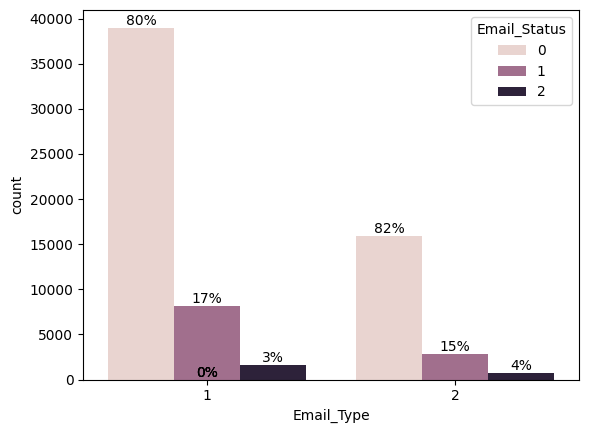

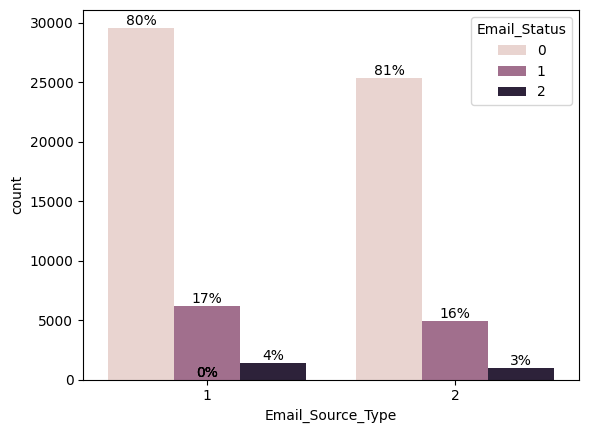

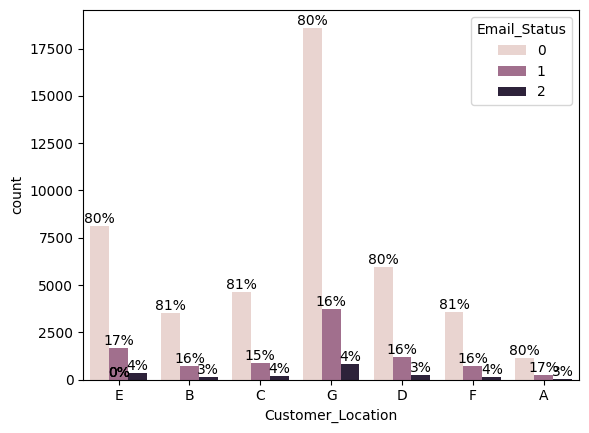

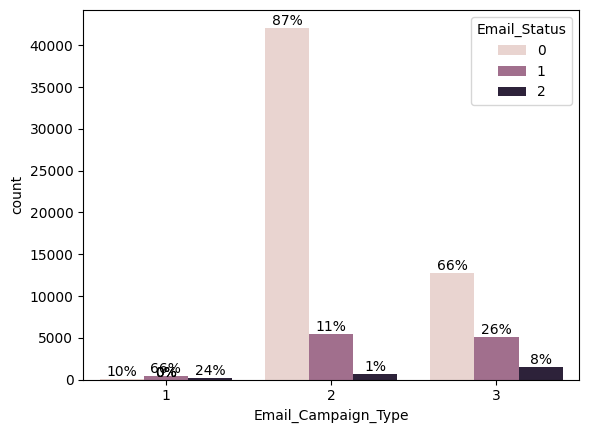

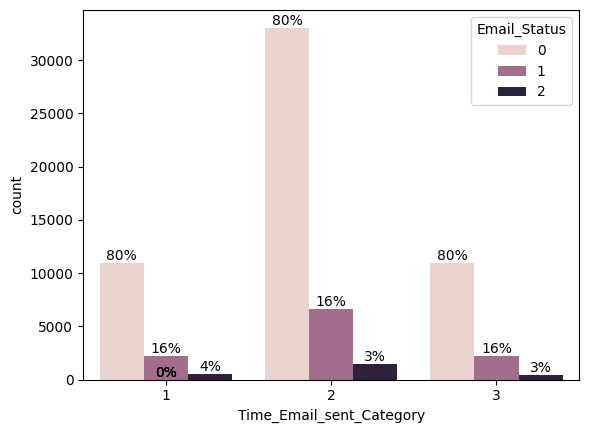

In [ ]:
#starting with categorical variables
categorical_variables = ['Email_Type','Email_Source_Type','Customer_Location','Email_Campaign_Type','Time_Email_sent_Category']
Target_var = ['Email_Status']

for i,value in enumerate(categorical_variables):
  ax = sns.countplot(x=df[value], hue=df[Target_var[0]])
  unique = len([x for x in df[value].unique() if x==x])
  bars = ax.patches
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  plt.show()

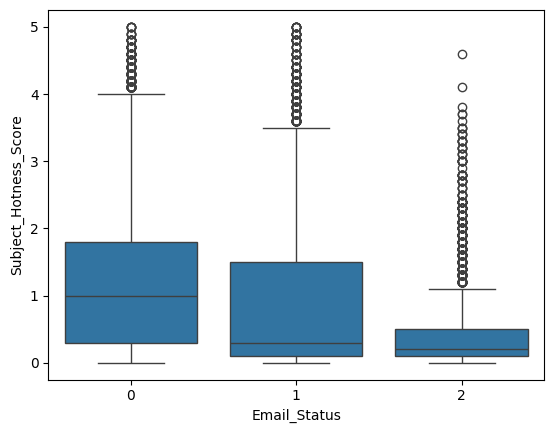

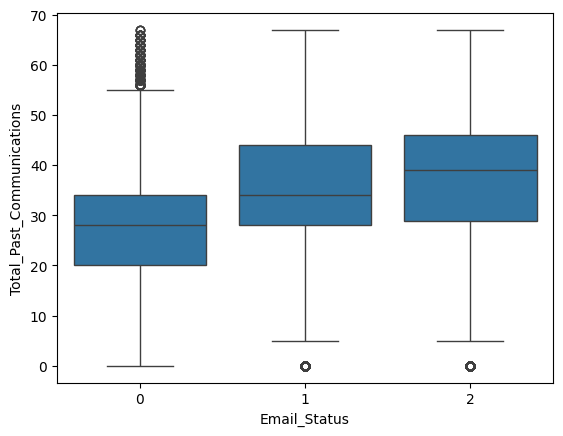

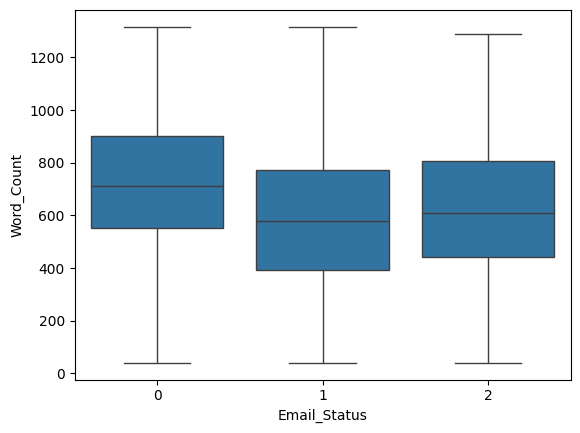

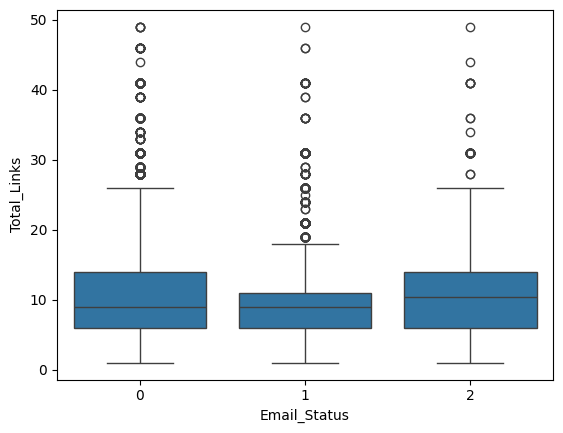

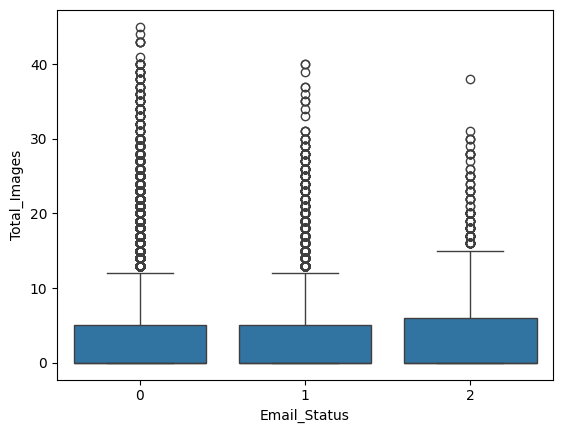

In [ ]:
#continuous variables through boxplots
cont_var = ['Subject_Hotness_Score', 'Total_Past_Communications','Word_Count','Total_Links','Total_Images']
for i, value in enumerate(cont_var):
 sns.boxplot(x=df['Email_Status'], y= df[value])
 plt.show()


<Axes: >

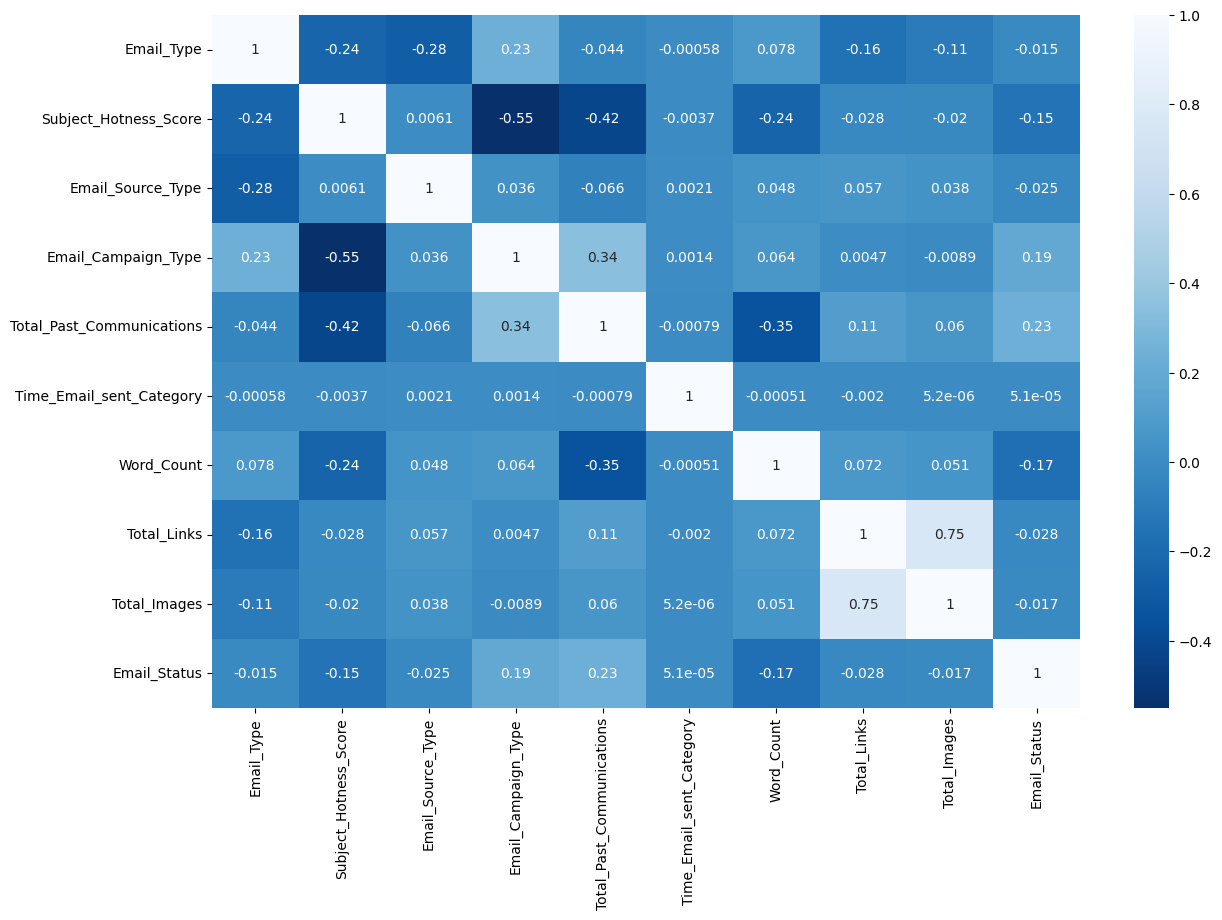

In [ ]:
#correlation matrix
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(), cmap='Blues_r', annot=True)

##Data Manipulation and Feature Engineering:
Data manipulation involves manipulating and changing our dataset before feeding it to various clasification machine learning models. This involves keeping important features handling multicollinearity in the dataset, outlier treatment and creating dummy variables if necessary.

We have outliers in our dataset as we saw it earlier in data exploration but as the classes are imbalanced and we cannot also risk overfitting, so we will be exploring how many outliers we have in each class and then decide whether we should keep them or get rid of them.



<Axes: xlabel='Total_Images', ylabel='Total_Links'>

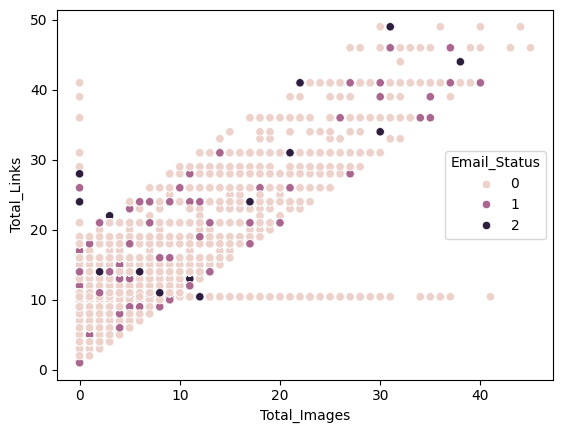

In [ ]:
#scatter plot between images and links, shows a linear relationship
sns.scatterplot(x=df["Total_Images"],y=df["Total_Links"],hue=df['Email_Status']) #it shows the collinearity

In [ ]:
#we can try combining them up
df['Total_Img_links'] = df['Total_Images'] + df['Total_Links']
df.drop(['Total_Images','Total_Links'],inplace=True,axis=1)

In [ ]:
#Let's check the number of outliers in each category of diff continuous features
cont_var.remove('Word_Count')
cont_var.remove('Total_Links')
cont_var.remove('Total_Images')
cont_var.append('Total_Img_links')


In [ ]:
#the number of outliers in different features acc to email_status
outliers = {}
for elem in cont_var:
  q_75, q_25 = np.percentile(df.loc[:,elem],[75,25])
  IQR = q_75-q_25
  max = q_75+(1.5*IQR)
  min = q_25-(1.5*IQR)
  outlier_list=[]
  outlier_list=df.loc[df[elem] < min]['Email_Status'].tolist()
  outlier_list.append(df.loc[df[elem] > max]['Email_Status'].tolist())
  outliers[elem]={}
  for i in outlier_list[0]:
      outliers[elem][i] = outliers[elem].get(i,0) + 1
print(outliers)

{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Total_Img_links': {0: 3061, 1: 437, 2: 122}}


We calculated the number of outliers with respect to the individual classes of our target variable. The minority class in our target variable is 1 and 2. But when we get rid of outliers we should check that we aren't deleting more than 5% of useful information related to minority class. Otherwise, the model will not be able to classify our minority classes correctly having lack of information. Let's check the percentage of outliers in minority class.

In [ ]:
df['Email_Status'].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

In [ ]:
#percentage of outliers in minority class
minority_outliers = 0
majority_outliers = 0
for col in cont_var:
  minority_outliers += outliers[col][1]
  minority_outliers += outliers[col][2]
  majority_outliers += outliers[col][0]

total_min = df['Email_Status'].value_counts()[1] + df['Email_Status'].value_counts()[2]
total_maj = df['Email_Status'].value_counts()[0]

min_per = (minority_outliers/total_min)*100   #number of outliers in minority classes by total number minority classes
maj_per = (majority_outliers/total_maj)*100  #number of outliers in majority class by total number of majority class
total_out = ((minority_outliers+majority_outliers)/(total_min+total_maj))*100
print(f'The percentage of outliers in minority classes is {min_per}')
print(f'The percentage of outliers in majority class is {maj_per}')
print(f'The percentage of total outliers are {total_out}')

The percentage of outliers in minority classes is 5.256486728303012
The percentage of outliers in majority class is 6.002803006861907
The percentage of total outliers are 5.856363290565154


In [ ]:
df.shape

(68353, 9)

In [ ]:
df['Email_Status'].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

In [ ]:
#deleting majority outliers
for elem in cont_var:
  q_low = df[elem].quantile(0.01)
  q_hi  = df[elem].quantile(0.99)
  df = df.drop(df[(df[elem] > q_hi) &  (df['Email_Status']==0)].index)
  df = df.drop(df[(df[elem] < q_low) & (df['Email_Status']==0)].index)

In [ ]:
df.shape

(66914, 9)

In [ ]:
df['Email_Status'].value_counts()

0    53502
1    11039
2     2373
Name: Email_Status, dtype: int64

**Feature Scaling**

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is done to prevent biased nature of machine learning algorithms towards features with greater values and scale.

In [ ]:
#let's add back word count
cont_var.append('Word_Count')

In [ ]:
#feature scaling of numerical variables
for elem in cont_var:
  df[elem] = (df[elem] - df[elem].mean()) / (df[elem].std())

df.head(1)

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Total_Img_links
0,1,1.163386,2,2,0.348093,1,-0.980426,0,-0.54345


**One hot encoding**

For categorical variables where no such ordinal relationship exists, the integer encoding is not enough. We have categorical data integer encoded with us, but assuming a natural order and allowing this data to the model may result in poor performance. If the
categorical variable is an output variable, you may also want to convert predictions by the model back into a categorical form in order to present them or use them in some application.

In [ ]:
#getting dummy variables for categorical data
categorical_variables.remove('Customer_Location')

In [ ]:
#categorical var that need to be encoded
categorical_variables

['Email_Type',
 'Email_Source_Type',
 'Email_Campaign_Type',
 'Time_Email_sent_Category']

In [ ]:
#creating dummy variables
df = pd.get_dummies(df,columns=categorical_variables)
# as some features had binary categories, we are going to delete one of them to keep it binary encoded and have less columns
df.drop('Email_Type_2',axis=1,inplace=True)
df.drop('Email_Source_Type_2',axis=1,inplace=True)
df.head(1)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Total_Img_links,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3
0,1.163386,0.348093,-0.980426,0,-0.54345,1,0,0,1,0,1,0,0


In [ ]:
#shape
df.shape

(66914, 13)

In [ ]:
#Email_Status should be the last col
columns=list(df.columns)
columns.remove('Email_Status')
columns.append('Email_Status')
df=df[columns]
df.head(1)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Img_links,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Email_Status
0,1.163386,0.348093,-0.980426,-0.54345,1,0,0,1,0,1,0,0,0


##**Modelling**:


In [ ]:
#X and Y
X = df.drop('Email_Status',axis=1)
y = df['Email_Status']
print(f'Shape of X: {X.shape}')
print(f'Shape of Y: {y.shape}')


Shape of X: (66914, 12)
Shape of Y: (66914,)


In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
#we need to stratify to get same proprtion of classes in both the sets

####**Handling Class Imbalance**

In the exploratory data analysis, we clearly saw that the number of emails being ignored was a lot more than being read and acknowledged.
This imbalance in the class, can lead to biased classification towards ignored emails. We can handle it with Oversampling and Undersampling.

First, we will go with Random Undersampling and check the results for various models that we will be testing and then with SMOTE. This technique generates synthetic data for the minority class. Lastly, we will analyze which method works for the best for our dataset.

Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.



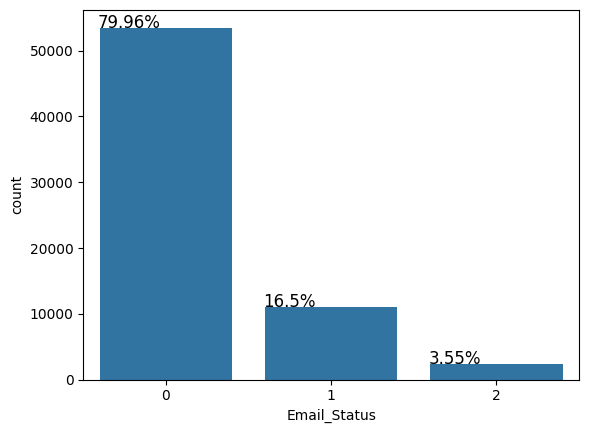

In [ ]:
#count plot for target variable
#visualizing our imbalanced dataset
ax = sns.countplot(x=df['Email_Status'])
totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)
plt.show()

Only 3% of observations are classified as acknowledged emails and 80% are ignored emails. This will create a bias in favour of ignored emails in the model.

In [ ]:
df['Email_Status'].value_counts()

0    53502
1    11039
2     2373
Name: Email_Status, dtype: int64

####**Logistic Regression:**

Logistic Regression is a classification algorithm that predicts the probability of an outcome that can have only two values.

Multinomial logistic regression is an extension of logistic regression that adds native support for multi-class classification problems.




In [ ]:
#importing libraries
from sklearn.linear_model import LogisticRegression
#fitting Undersampling
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Making predictions random undersampling
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Y Train Prediction:",y_pred_train,"\n""Y Test Prediction:",y_pred_test)


Y Train Prediction: [0 0 0 ... 0 0 0] 
Y Test Prediction: [0 0 0 ... 0 0 1]


In [ ]:
#probs
train_proba = model.predict_proba(X_train)
test_proba = model.predict_proba(X_test)
print("Train Probability:""\n",train_proba,"\n""\n""Test Probability:""\n",test_proba)

Train Probability:
 [[0.5898923  0.32195988 0.08814782]
 [0.66399373 0.31702062 0.01898566]
 [0.93437341 0.05517616 0.01045043]
 ...
 [0.68746765 0.26175005 0.0507823 ]
 [0.84635899 0.12887681 0.02476421]
 [0.83600789 0.14320952 0.02078258]] 

Test Probability:
 [[0.84964737 0.11799032 0.03236232]
 [0.88067181 0.10108697 0.01824122]
 [0.80311212 0.18597017 0.01091771]
 ...
 [0.65313598 0.29779949 0.04906453]
 [0.60789883 0.31327186 0.07882931]
 [0.40341907 0.47014416 0.12643678]]


In [ ]:
#Accuracy
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test,y_pred_test)
print("Train Accuracy:",accuracy_train,"\n""Test Accuracy:",accuracy_test)

Train Accuracy: 0.8092880760680727 
Test Accuracy: 0.8122244638720765


In [ ]:
#Confusion Matrix
cm_train = confusion_matrix(y_train,y_pred_train)
cm_test = confusion_matrix(y_test,y_pred_test)
print("Train Confusion Matrix:""\n",cm_train,"\n""\n""Test Confusion Matrix:""\n",cm_test)

Train Confusion Matrix:
 [[41835   967     0]
 [ 7344  1487     0]
 [ 1423   475     0]] 

Test Confusion Matrix:
 [[10485   215     0]
 [ 1823   385     0]
 [  367   108     0]]


In [ ]:
#Recall
train_recall = recall_score(y_train,y_pred_train, average='weighted')
test_recall = recall_score(y_test,y_pred_test, average='weighted')
print("Train Recall:",train_recall,"\n""Test Recall:",test_recall)

Train Recall: 0.8092880760680727 
Test Recall: 0.8122244638720765


In [ ]:
#Precision
train_precision = precision_score(y_train,y_pred_train, average='weighted')
test_precision = precision_score(y_test,y_pred_test, average='weighted')
print("Train Precision:",train_precision,"\n""Test Precision:",test_precision)

Train Precision: 0.7447968348740457 
Test Precision: 0.7510962093440926


In [ ]:
#F1 Score
train_f1 = f1_score(y_train,y_pred_train, average='weighted')
test_f1 = f1_score(y_test,y_pred_test, average='weighted')
print("Train F1 Score:",train_f1,"\n""Test F1 Score:",test_f1)

Train F1 Score: 0.7579667149252736 
Test F1 Score: 0.7608269350495246


In [ ]:
#ROC-AUC
train_auc = roc_auc_score(y_train,train_proba,average='weighted',multi_class = 'ovr')
test_auc = roc_auc_score(y_test,test_proba,average='weighted',multi_class = 'ovr')
print("Train AUC Score:",train_auc,"\n""Test AUC Score:",test_auc)

Train AUC Score: 0.7796036268381878 
Test AUC Score: 0.7779769107743802


####**Decison Tree Model:**
Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [ ]:
#Importing libraries
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Classifier RUS
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
#Making predictions random undersampling
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)
print("Y Train Prediction:",y_pred_train,"\n""Y Test Prediction:",y_pred_test)

Y Train Prediction: [0 0 0 ... 0 0 0] 
Y Test Prediction: [1 0 0 ... 0 0 1]


In [ ]:
#probs
train_proba = dt_model.predict_proba(X_train)
test_proba = dt_model.predict_proba(X_test)
print("Train Probability:""\n",train_proba,"\n""\n""Test Probability:""\n",test_proba)

Train Probability:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]] 

Test Probability:
 [[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


##**Conclusion:**


**Evaluation Metrics:**

There is a number of model evaluation metrics to choose from but since our dataset was highly imbalanced, it is critical to understand which metric should be evaluated to understand the model performance.

* Accuracy- Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions. Accuracy is useful when the target class is well balanced but is not a good choice for the unbalanced classes, because if the model poorly predicts every observation as of the majority class, we are going to get a pretty high accuracy.

* Confusion Matrix - It is a performance measurement criteria for the machine learning classification problems where we get a table with a combination of predicted and actual values.

* Precision - Precision for a label is defined as the number of true positives divided by the number of predicted positives.

* Recall - Recall for a label is defined as the number of true positives divided by the total number of actual positives. Recall explains how many of the actual positive cases we were able to predict correctly with our model.

* F1 Score - It's actually the harmonic mean of Precision and Recall. It is maximum when Precision is equal to Recall.

* AUC ROC - The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes. When AUC is 0.5, the classifier is not able to distinguish between the classes and when it's closer to 1,the more good it becomes in distingushing them.


**So among all the above metrics, which metric should be prioritised in comparing the performance of our various models? That's the major question here as we have a multiclass classification problem, where the problem statement just asks us to track and classify between ignored, read and acknowledged classes, we can not decide here what we want to prioritise in terms of classification, we just want to correctly classify and characterize accordingly. On top of that our data is highly imbalanced, which we tried to encounter in the ways possible.**

**When we have a high class imbalance, we'll choose the F1 score because a high F1 score considers both precision and recall. To get a high F1, both false positives and false negatives must be low. The F1 score depends on how highly imbalanced our dataset is!**

**Observation:**

Exploratory Data Analysis:

* In the customer location feature we can find that irrespective of the location, the percentage ratio of emails being ignored, read and acknowledged are kind of similar. It does not exclusively influence our target variable. It would be better to not consider location as a factor in people ignoring, reading or acknowledging our emails.

* In the Email Campaign Type feature, it seems like in campaign type 1 very few emails were sent but has a very high likelihood of getting read. Most emails were sent under email campaign type 2 and most ignored. Seems like campaign 3 was a success as even when less number of emails were sent under campaign 3, more emails were read and acknowledged.

* Time email sent category cannot be considered as a relevant factor in classifying the emails. Both the feature importance showed this particular thing. If we consider Time email sent category 2 as middle of the of course they are going to be read and acknowledged more than morning and night.

* Analyzing total past communications, we can see that the more the number of previous emails, the more it leads to read and acknowledged emails. This is just about making connection with your customers.

* The more the words in an email, the more it has a tendency it has to get ignored. Too lengthy emails are getting ignored.

* More images were there in ignored emails.
* There are outliers in almost every continuous variable except Word Count and upon analyzing, it was found that outliers make up for more than 5% of the minority data and will influence the results either way, so it was better not to get rid of them.

Modeling:
* Imbalanced Class Handling techniques such as Undersampling and SMOTE were done after train-test split only on the training data, to make sure that the model doesn't catch up to the test set at all and it remains unknown which somewhat reduced our results.
* It is observed that SMOTE worked considerably better than Random Undersampling, it may have led to loss of information.
* Decision Tree Model is overfitting. It is working really great on train data and worse on test data.
* Hyperparameter tuning isn't improving the results to a great degree.
* XGBoost Algorithm worked in the best way possible with such imbalanced data with outliers, followed by Random Forest Hyperparameter Tuned model after feature selection with F1 Score of 0.71 on the test set.


Recommendations:

Upon this in-depth exploratory data analysis and feature importance of various good models, we came to a conclusion and mentioned some factors that are leading to a higher number of ignored emails and accordingly here are some recommendations.
* Email Campaign Type 1 and 3 are doing better than 2. So, focusing on improving 2, can do the trick.
* The word count should be reasonable. The content should be crisp and to the point with a few marketing gimmicks.
* The number of images and links should be kept in check.
* Total past communications had a positive influence, hence having a healthy relationship with customers is a big yes.
